<a href="https://colab.research.google.com/github/supermarios77/DoodleIt/blob/main/DoodleIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Doodle It -**A Neural Network Trained To Predict Your Doodles

An application powered by TensorFlow neural networks that allows you to draw what it tells you to in 30 seconds.

But... Theres A Twist, It Gives You The Features Of The Thing And You Guess What It Is Then Draw It.

We'll Be Making Four Models:

1. **Model_1 -** Conv2D With GlobalMaxPool2D

2. **Model_2 -** GRU And LSTM

3. **Model_3 -** Simple Dense

4. **Model_4 -** Hybrid Embedding



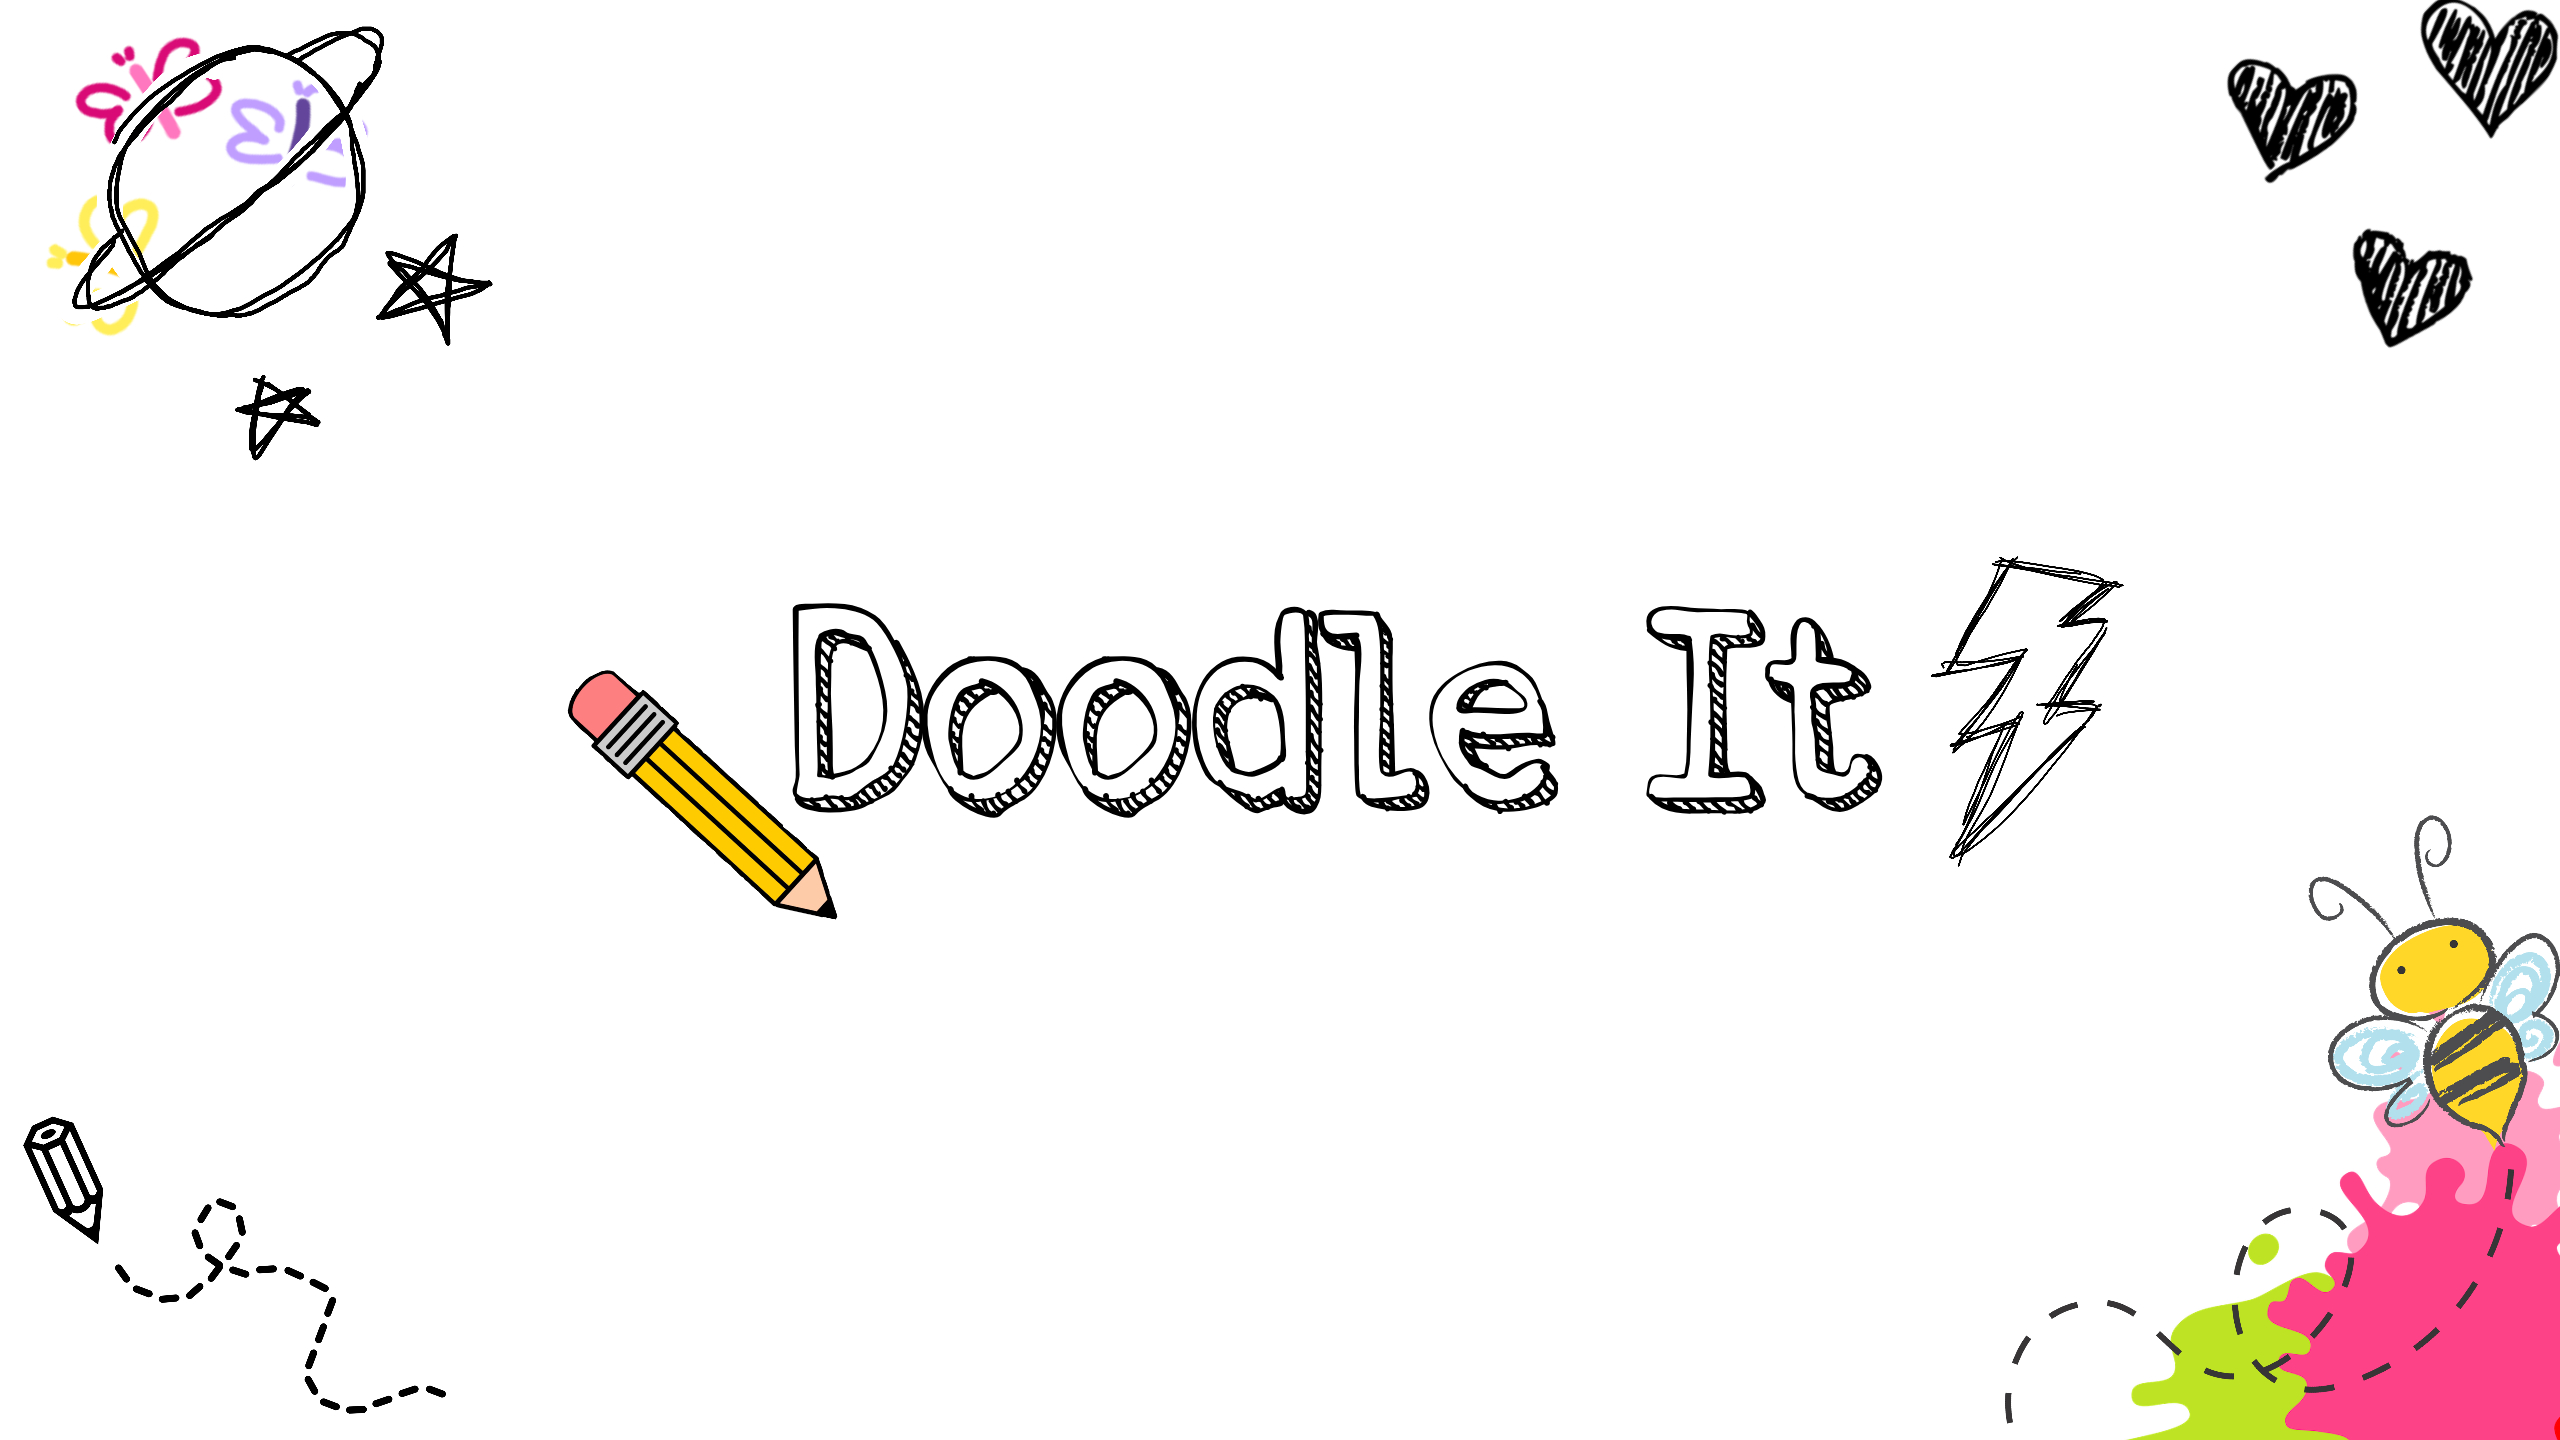


## **Get Our Data And Preprocess It**

### **Get Some Helper Functions**

In [1]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-03-10 12:17:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-10 12:17:46 (66.8 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



### **Get The Data**

In [2]:
# Mount Google Drive

from google.colab import drive

drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [3]:
unzip_data('/content/Drive/MyDrive/DoodleItDataset.zip')

### **Preprocess The Data!**

In [4]:
# Import some modules

import numpy as np

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [5]:
# List of class labels

classes = ['The Great Wall of China', 'airplane', 'alarm clock', 'ant', 'axe', 'bandage', 'baseball', 'bathtub', 'beach', 'bear', 'bed', 'bee', 'bench', 'bird', 'birthday cake', 'blackberry', 'book', 'bread', 'broccoli', 'broom', 'butterfly', 'cactus', 'cat', 'cup', 'donut', 'drums', 'ear', 'hat', 'headphones', 'hockey stick']

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(data, max_sequence_length):
    # Assuming 'train' set contains training data
    train_data = data['train']

    # Extract strokes and labels from 'train' data
    strokes = [entry[:-1] for entry in train_data]  # Exclude the last element (label)
    labels = [entry[-1] for entry in train_data]

    # Normalize the stroke data (you may need to adjust this based on your specific data)
    normalized_strokes = [stroke / 255.0 for stroke in strokes]

    # Pad sequences to a fixed length
    padded_strokes = pad_sequences(normalized_strokes, maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')

    # Convert labels to categorical if needed (you might need to adjust this based on your labels)
    # For example, if your labels are integers representing classes
    categorical_labels = np.array(labels)

    return padded_strokes, categorical_labels

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

def data_generator(classes, batch_size=1000, max_sequence_length=100):
    for class_label in classes:
        npz_path = f'/content/DoodleItDataset/{class_label}.npz'
        data = np.load(npz_path, allow_pickle=True, encoding='latin1')

        # Preprocess data
        preprocessed_data, class_labels = preprocess_data(data, max_sequence_length)

        # Split the data into batches
        num_batches = len(preprocessed_data) // batch_size
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size

            yield preprocessed_data[start_idx:end_idx], class_labels[start_idx:end_idx]

# Initialize empty lists for X and y
X = []
y = []

# Set the maximum sequence length
max_sequence_length = 200

# Set the batch size
batch_size = 1000

# Use the data generator
for X_batch, y_batch in data_generator(classes, batch_size, max_sequence_length):
    X.extend(X_batch)
    y.extend(y_batch)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Visualise The Dataset**